In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# load data
original_df = pd.read_csv('../../data/data_exploration_df.csv')

# make a copy
df = original_df.copy()

### functions

In [30]:
# function that takes in the events_to_analyze and returns the dataframes for each event with the lenght, number of NaN values, and print the names of the created dataframes
def create_event_dataframes(events_to_analyze, df):
    event_dataframes = {}
    for event in events_to_analyze:
        event_dataframes[event] = df[df['event.key'] == event]
        print(event, 'dataframe created')
    return event_dataframes

# function that creates a dataframe where event.key is a NaN value
def create_nan_event_dataframes(df):
    nan_event_df = df[df['event.key'].isna()]
    print('NaN event dataframe created')
    return nan_event_df

# function that takes in the event_dataframes nan_event_df and returns the lenght, number of NaN values for each column in each dataframe
def analyze_event_dataframes(event_dataframes, nan_event_df):
    for event in event_dataframes:
        print(event, 'dataframe')
        print('Lenght:', len(event_dataframes[event]))
        print('Number of unique imei values:', event_dataframes[event]['imei'].nunique())
        print('-----------------------------------')
        print('Number of NaN values:')
        print(event_dataframes[event].isna().sum())
        print('\n')
    print('NaN event dataframe')
    print('Lenght:', len(nan_event_df))
    print('Number of unique imei values:', nan_event_df['imei'].nunique())
    print('-----------------------------------')
    print('Number of NaN values:')
    print(nan_event_df.isna().sum())

# function that shows the describe() of all the events_to_analyze for each event and also for the nan_event_df
def describe_event_dataframes(event_dataframes, nan_event_df):
    for event in event_dataframes:
        print(event, 'dataframe')
        print(event_dataframes[event].describe())
        print('\n')
    print('NaN event dataframe')
    print(nan_event_df.describe())

    # function that plots the histograms of the columns_to_analyze for each event and also for the nan_event_df, but do not create one if the column has no values 
def plot_histograms(event_dataframes, nan_event_df, columns_to_analyze):
    for event in event_dataframes:
        print(event, 'dataframe')
        #if the columns only have NaN values, the histogram will not be created
        for column in columns_to_analyze:
            if event_dataframes[event][column].isna().sum() != len(event_dataframes[event]):
                event_dataframes[event][column].hist()
                plt.title(column)
                plt.show()
    print('NaN event dataframe')
    for column in columns_to_analyze:
        nan_event_df[column].hist()
        plt.title(column)
        plt.show()


### variables

In [31]:
events_to_analyze = ['battery_info', 'crash_data','backup_to_main_battery', 'main_to_backup_battery','rest_to_motion', 'motion_to_rest']
columns_to_analyze = ['tracker.loc.sp',
                      'tracker.metric.bbatp',
                      'tracker.metric.bbatv',
                      'tracker.metric.rssi',
                      'device.metric.bmv',
                      'device.metric.dactualsp',
                      'device.metric.btemp'
                      ]

### execute

In [32]:
event_dataframes = create_event_dataframes(events_to_analyze, df)

battery_info dataframe created
crash_data dataframe created
backup_to_main_battery dataframe created
main_to_backup_battery dataframe created
rest_to_motion dataframe created
motion_to_rest dataframe created


In [33]:
nan_event_df = create_nan_event_dataframes(df)

NaN event dataframe created


In [34]:
analyze_event_dataframes(event_dataframes, nan_event_df)

battery_info dataframe
Lenght: 37754
Number of unique imei values: 948
-----------------------------------
Number of NaN values:
imei                           0
dtd                            0
dts                            0
event.dte                      0
tracker.loc.sp             37754
tracker.metric.bbatp           0
tracker.metric.bbatv           0
tracker.metric.moving      37754
tracker.metric.rssi        37754
device.metric.bmv          19985
device.metric.dactualsp    37754
device.metric.btemp        21031
event.key                      0
dtype: int64


crash_data dataframe
Lenght: 20320
Number of unique imei values: 472
-----------------------------------
Number of NaN values:
imei                           0
dtd                            0
dts                            0
event.dte                      0
tracker.loc.sp             20320
tracker.metric.bbatp       20320
tracker.metric.bbatv       20320
tracker.metric.moving      20320
tracker.metric.rssi        20320
dev

In [35]:
describe_event_dataframes(event_dataframes, nan_event_df)

battery_info dataframe
               imei  tracker.loc.sp  tracker.metric.bbatp  \
count  3.775400e+04             0.0          37754.000000   
mean   8.685001e+14             NaN             87.656805   
std    4.865396e+03             NaN             25.455468   
min    8.685001e+14             NaN              0.000000   
25%    8.685001e+14             NaN             92.000000   
50%    8.685001e+14             NaN            100.000000   
75%    8.685001e+14             NaN            100.000000   
max    8.685001e+14             NaN            100.000000   

       tracker.metric.bbatv  tracker.metric.rssi  device.metric.bmv  \
count          37754.000000                  0.0       17769.000000   
mean               3.997869                  NaN          16.468096   
std                0.606651                  NaN          11.475366   
min                0.000000                  NaN           0.003000   
25%                4.071000                  NaN           9.733000   
5

battery_info dataframe


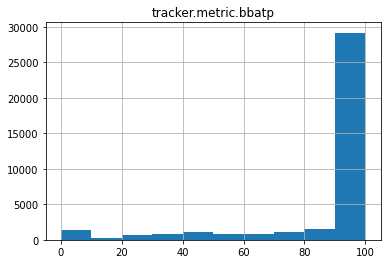

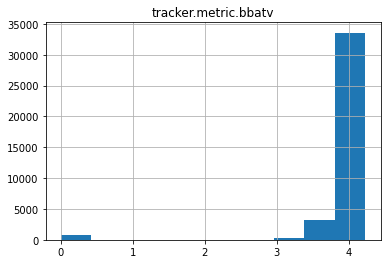

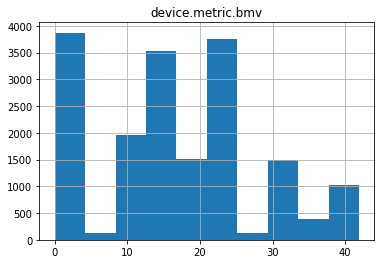

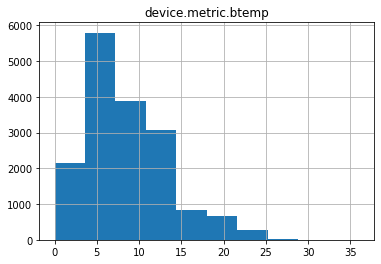

crash_data dataframe
backup_to_main_battery dataframe


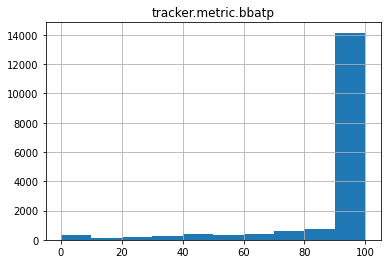

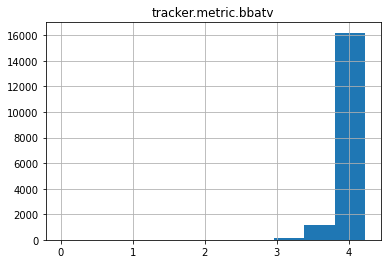

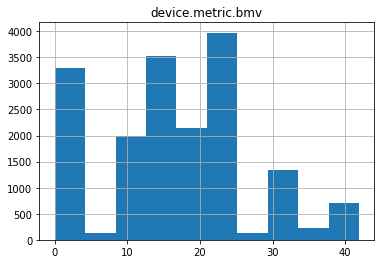

main_to_backup_battery dataframe


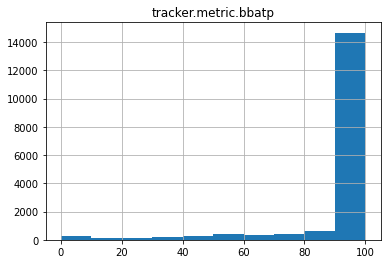

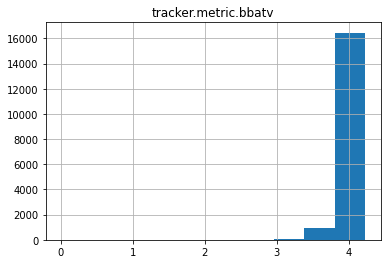

rest_to_motion dataframe


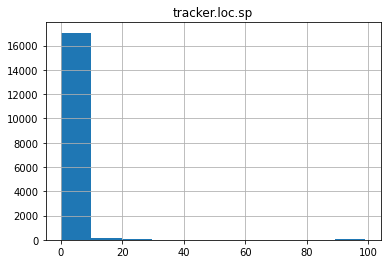

motion_to_rest dataframe


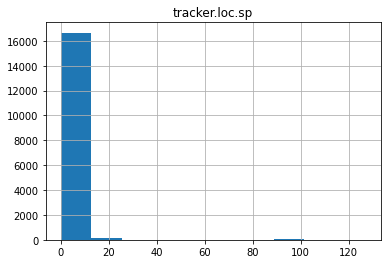

NaN event dataframe


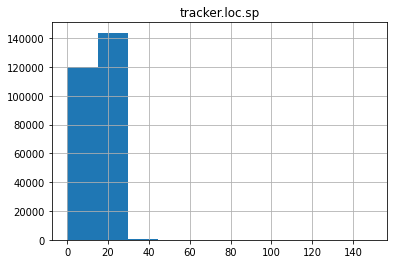

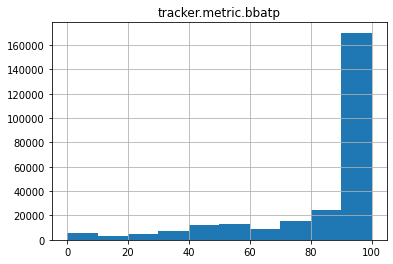

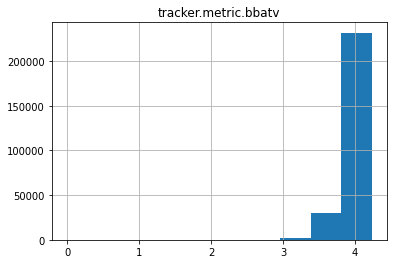

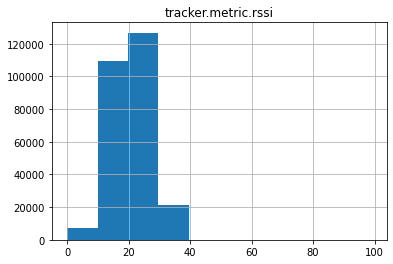

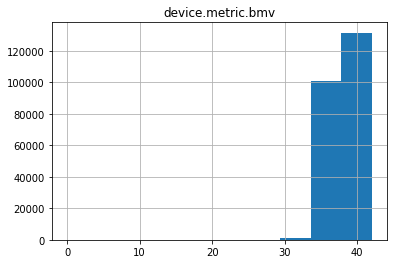

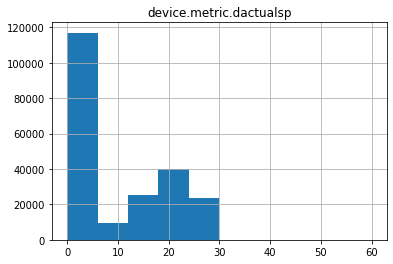

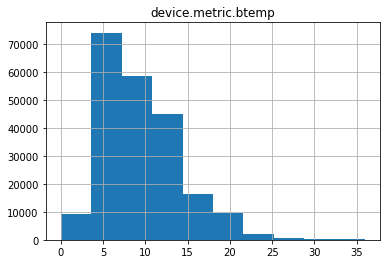

In [36]:
plot_histograms(event_dataframes, nan_event_df, columns_to_analyze)

In [44]:
# show highest tracker.loc.sp for the motion_to_rest df
print('motion_to_rest dataframe')
print(event_dataframes['motion_to_rest'].loc[event_dataframes['motion_to_rest']['tracker.loc.sp'].idxmax()])

motion_to_rest dataframe
imei                                 868500050057470
dtd                        2023-04-22 20:25:16+00:00
dts                             2023-04-22T20:25:19Z
event.dte                       2023-04-22T20:25:16Z
tracker.loc.sp                                 127.0
tracker.metric.bbatp                             NaN
tracker.metric.bbatv                             NaN
tracker.metric.moving                          False
tracker.metric.rssi                              NaN
device.metric.bmv                                NaN
device.metric.dactualsp                          NaN
device.metric.btemp                              NaN
event.key                             motion_to_rest
Name: 20549, dtype: object


In [45]:
#show the highest tracker.loc.sp for the NaN event df
print('NaN event dataframe')
print(nan_event_df.loc[nan_event_df['tracker.loc.sp'].idxmax()])

NaN event dataframe
imei                                 868500050057470
dtd                        2023-04-22 19:01:40+00:00
dts                             2023-04-22T19:01:43Z
event.dte                                        NaN
tracker.loc.sp                                 149.0
tracker.metric.bbatp                            86.0
tracker.metric.bbatv                           4.033
tracker.metric.moving                           True
tracker.metric.rssi                             20.0
device.metric.bmv                                NaN
device.metric.dactualsp                          NaN
device.metric.btemp                              NaN
event.key                                        NaN
Name: 20503, dtype: object


In [46]:
# show the highest device.metric.dactualsp for the NaN event df
print('NaN event dataframe')
print(nan_event_df.loc[nan_event_df['device.metric.dactualsp'].idxmax()])

NaN event dataframe
imei                                 868500050063486
dtd                        2023-11-28 13:11:29+00:00
dts                             2023-11-28T13:11:49Z
event.dte                                        NaN
tracker.loc.sp                                   NaN
tracker.metric.bbatp                             NaN
tracker.metric.bbatv                             NaN
tracker.metric.moving                            NaN
tracker.metric.rssi                              NaN
device.metric.bmv                                NaN
device.metric.dactualsp                         60.0
device.metric.btemp                              7.0
event.key                                        NaN
Name: 379819, dtype: object
